In [3]:
# !pip install wordcloud
# !pip install multidict

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import os
from os import path
import MeCab
import unidic
import sys
import re
import unicodedata
import matplotlib.pyplot as plt
import tqdm
import japanize_matplotlib
import collections
import glob
import multidict as multidict

## wordcloud for all words

In [2]:
# Create wordcloud image for every words
fields = ['word',"total"]

## CHANGE FILE NAME!!!
text_all = pd.read_csv('japeseFemaleIdol_text_overall.csv', encoding='UTF-8',usecols=fields)
text_all.set_index("word").to_dict()
text_all_dict = text_all.set_index("word").to_dict()['total']

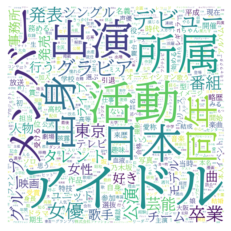

In [9]:
wc = WordCloud(background_color="white", \
               max_words=1000,font_path= "C:\Windows\Fonts\BIZ-UDMinchoM.TTC",\
               width=600,height=600)

# generate word cloud
wc.generate_from_frequencies(text_all_dict)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# plt.show()

#save
### CHANGE FILE NAME!!
wc.to_file("wc_japaneseFemalIdol_all.png")


In [10]:
# create a html file
# link each word to online Japanese dictionary (https://jisho.org/)
wc.to_svg()

# JavaScript to link each word
link_script = """
<script>
    svg = document.querySelectorAll("svg text").forEach(element => {
    element.addEventListener("click", function() {
        word = this.textContent;
        word_uri = encodeURI(word);
        url = "https://jisho.org/search/" + word_uri;
        window.open(url, "_blank");
    })
})
</script>"""

# HTML
## CHANGE FILE NAME!!!
with open("japaneseFemaleIdolAll.html", "w", encoding='UTF-8') as f:
    f.write("<!DOCTYPE HTML>\n")
    f.write(wc.to_svg())
    f.write(link_script)

## Noun wordcloud

In [11]:
# create wc for noun(名詞)
df = pd.read_csv('japeseFemaleIdol_text_overall.csv', encoding='UTF-8')
noun = df[df.pos == "名詞"]
noun2 = noun.drop("pos", axis=1)
noun2.head()

,word,total,articles
0,アイドル,15624,3716
1,活動,12470,2334
2,所属,10798,3322
3,出演,10362,1838
4,日本,10072,3966


In [12]:
noun2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24281 entries, 0 to 27576
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   word      24281 non-null  object
 1   total     24281 non-null  int64 
 2   articles  24281 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 758.8+ KB


In [13]:
noun_dict = noun2.set_index("word").to_dict()['total']

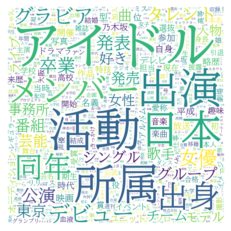

In [14]:
wc = WordCloud(background_color="white", \
               max_words=1000,font_path= "C:\Windows\Fonts\BIZ-UDMinchoM.TTC",\
               width=600,height=600)

# generate word cloud
## CHANGE (blah)
wc.generate_from_frequencies(noun_dict)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# plt.show()

#save
### CHANGE FILE NAME!!
wc.to_file("wc_japaneseFemaleIdol_noun.png")


In [15]:
# create a html file
# link each word to online Japanese dictionary (https://jisho.org/)
wc.to_svg()

# JavaScript to link each word
link_script = """
<script>
    svg = document.querySelectorAll("svg text").forEach(element => {
    element.addEventListener("click", function() {
        word = this.textContent;
        word_uri = encodeURI(word);
        url = "https://jisho.org/search/" + word_uri;
        window.open(url, "_blank");
    })
})
</script>"""

# HTML
## CHANGE FILE NAME!!!
with open("japaeseFemaleIdolNoun.html", "w", encoding='UTF-8') as f:
    f.write("<!DOCTYPE HTML>\n")
    f.write(wc.to_svg())
    f.write(link_script)

## Verb

In [16]:
# verb (動詞)
df = pd.read_csv('japeseFemaleIdol_text_overall.csv', encoding='UTF-8')
## CHANGE POS
verb = df[df.pos == "動詞"]
verb2 = verb.drop("pos", axis=1)
verb2.head()

,word,total,articles
26,行う,3982,1027
38,務める,3002,841
64,いう,1952,510
68,受ける,1838,576
93,選ぶ,1454,533


In [17]:
verb2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2889 entries, 26 to 27550
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   word      2889 non-null   object
 1   total     2889 non-null   int64 
 2   articles  2889 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 90.3+ KB


In [18]:
verb_dict = verb2.set_index("word").to_dict()['total']

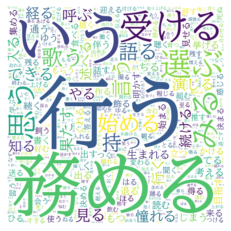

In [19]:
wc = WordCloud(background_color="white", \
               max_words=500, #change if needed\
               font_path= "C:\Windows\Fonts\BIZ-UDMinchoM.TTC",\
               width=600,height=600)

# generate word cloud
## CHANGE (blah)
wc.generate_from_frequencies(verb_dict)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# plt.show()

#save
### CHANGE FILE NAME!!
wc.to_file("wc_japaneseFemaleIdol_verb.png")

In [26]:
# create a html file
# link each word to online Japanese dictionary (https://jisho.org/)
wc.to_svg()

# JavaScript to link each word
link_script = """
<script>
    svg = document.querySelectorAll("svg text").forEach(element => {
    element.addEventListener("click", function() {
        word = this.textContent;
        word_uri = encodeURI(word);
        url = "https://jisho.org/search/" + word_uri;
        window.open(url, "_blank");
    })
})
</script>"""

# HTML
## CHANGE FILE NAME!!!
with open("japaneseFemaleIdolVerb.html", "w", encoding='UTF-8') as f:
    f.write("<!DOCTYPE HTML>\n")
    f.write(wc.to_svg())
    f.write(link_script)

## Adjective

In [21]:
# adj (形容詞)
df = pd.read_csv('japeseFemaleIdol_text_overall.csv', encoding='UTF-8')
## CHANGE POS
adj = df[df.pos == "形容詞"]
adj2 = adj.drop("pos", axis=1)
adj2.head()

,word,total,articles
70,ない,1814,503
141,多い,1060,362
240,良い,642,229
260,いい,594,214
379,強い,438,157


In [22]:
adj2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407 entries, 70 to 27302
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   word      407 non-null    object
 1   total     407 non-null    int64 
 2   articles  407 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 12.7+ KB


In [23]:
adj_dict = adj2.set_index("word").to_dict()['total']

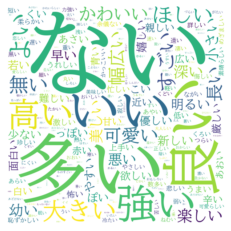

In [24]:
wc = WordCloud(background_color="white", \
               max_words=500, #change if needed\
               font_path= "C:\Windows\Fonts\BIZ-UDMinchoM.TTC",\
               width=600,height=600)

# generate word cloud
## CHANGE (blah)!!!!
wc.generate_from_frequencies(adj_dict)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# plt.show()

#save
### CHANGE FILE NAME!!
wc.to_file("wc_japaneseFemaleIdol_adj.png")

In [25]:
# create a html file
# link each word to online Japanese dictionary (https://jisho.org/)
wc.to_svg()

# JavaScript to link each word
link_script = """
<script>
        svg = document.querySelectorAll("svg text").forEach(element => {
    element.addEventListener("click", function() {
        word = this.textContent;
        word_uri = encodeURI(word);
        url = "https://jisho.org/search/" + word_uri;
        window.open(url, "_blank");
    })
})
</script>"""

# HTML
## CHANGE FILE NAME!!!
with open("japaneseFemaleIdolAdj.html", "w", encoding='UTF-8') as f:
    f.write("<!DOCTYPE HTML>\n")
    f.write(wc.to_svg())
    f.write(link_script)